In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import time

import agent

In [76]:
a = agent.agent()
a.spawn_vehicle()
a.spawn_imu(0.1, 2000)
a.spawn_gnss(0.1, 2000)

for i in tqdm(range(2000)):
    while(i > len(a.gnss_list)):
        time.sleep(0.09)

 Spawning vehicle at location : 42, -4, 0
 Vehicle model : nissan micra
 16%|█▌        | 322/2000 [00:34<02:59,  9.37it/s]


KeyboardInterrupt: 

In [73]:
pos = np.asarray([(x[0][0], x[0][1]) for x in a.rpos_list])
plt.plot(pos[:,0], pos[:,1])
plt.title("Actual trajectory")
plt.show()

plt.plot([x[0][2] for x in a.rpos_list])
plt.title('Altitude variation')
plt.show()

NameError: name 'a' is not defined

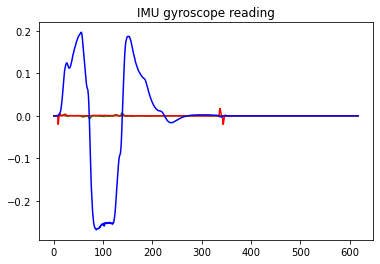

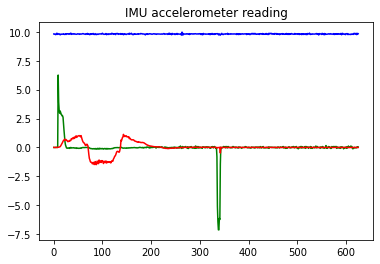


 x axis acceleration average : 0.166
 y axis acceleration average : 0.231


In [10]:
plt.plot([x.gyroscope.x for x in a.imu_list], 'g')
plt.plot([x.gyroscope.y for x in a.imu_list], 'r')
plt.plot([x.gyroscope.z for x in a.imu_list], 'b')
plt.title('IMU gyroscope reading')
plt.show()

plt.plot([x.accelerometer.x for x in a.imu_list], 'g')
plt.plot([x.accelerometer.y for x in a.imu_list], 'r')
plt.plot([x.accelerometer.z for x in a.imu_list], 'b')
plt.title('IMU accelerometer reading')
plt.show()

print()
print(" x axis acceleration average : %.3f"%np.average(np.abs([x.accelerometer.x for x in a.imu_list])))
print(" y axis acceleration average : %.3f"%np.average(np.abs([x.accelerometer.y for x in a.imu_list])))

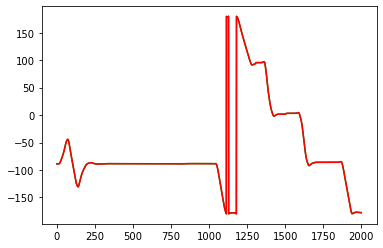

0.5388867928137361


Text(0.5, 1.0, 'trajectory')

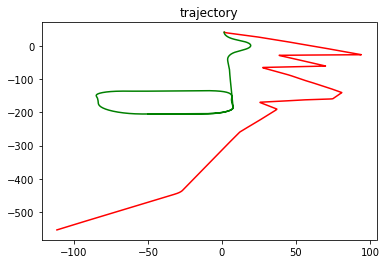

In [65]:
imu_time = [x.timestamp for x in a.imu_list]
imu_vel  = [(0, 0)]
imu_rot  = [a.imu_list[0].transform.rotation.yaw]
imu_pos  = [(a.imu_list[0].transform.location.x, a.imu_list[0].transform.location.y)]

for i in range(1, len(a.gnss_list)):
    dt = a.imu_list[i].timestamp - a.imu_list[i-1].timestamp
    gyro = a.imu_list[i].gyroscope
    
    # Update rotation
    yaw = imu_rot[i-1]+(gyro.z*dt*180/np.pi)

    if(yaw > 180):
        yaw = yaw - 360
    elif(yaw < -180):
        yaw = yaw + 360

    imu_rot.append(yaw)

    yaw = a.imu_list[i].transform.rotation.yaw

    # Find x and y components of acceleration
    accel_xl = a.imu_list[i].accelerometer.x
    accel_yl = a.imu_list[i].accelerometer.y

    accel_xg = accel_xl * np.cos(yaw) - accel_yl * np.sin(yaw)
    accel_yg = accel_xl * np.sin(yaw) + accel_yl * np.cos(yaw)

    vel_x = imu_vel[i-1][0] + accel_xg * dt
    vel_y = imu_vel[i-1][1] + accel_yg * dt
    imu_vel.append((vel_x, vel_y))

    pos_x = imu_pos[i-1][0] + vel_x * dt
    pos_y = imu_pos[i-1][1] + vel_y * dt
    imu_pos.append((pos_x, pos_y))

plt.plot(imu_rot, 'g')
plt.plot([x.transform.rotation.yaw for x in a.imu_list], 'r')
plt.show()
print(np.average(np.abs(([a.imu_list[i].transform.rotation.yaw - imu_rot[i] for i in range(len(imu_rot))]))))

pos = np.asarray([(x[0], x[1]) for x in imu_pos])
plt.plot(pos[:,0], pos[:,1], 'r')
pos = np.asarray([(x[0][0], x[0][1]) for x in a.rpos_list])
plt.plot(pos[:,0], pos[:,1], 'g')
plt.title("trajectory")

In [72]:
del a